In [37]:
import imageio
import torch
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
%matplotlib inline


In [46]:
frame_sample_rate = 10
videosList=[]
for vidIdx in range(7):
    vidCv2 = cv2.VideoCapture(f'data/usliverseq-mp4/volunteer{str(vidIdx+1).zfill(2)}.mp4')
    frameIdx = 0
    frames = []
    while(vidCv2.isOpened()):
        ret, frame = vidCv2.read()
        if ret == True and frameIdx % frame_sample_rate == 0:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame)
        if ret == False:
            break
        frameIdx+=1

    #number of frames in video:
    print(f'volunteer{str(vidIdx+1).zfill(2)}.mp4:\n')
    print("number of frames:" ,int(vidCv2.get(cv2.CAP_PROP_FRAME_COUNT)))
    #frame size:
    print("frame size:" ,int(vidCv2.get(cv2.CAP_PROP_FRAME_WIDTH)), "x", int(vidCv2.get(cv2.CAP_PROP_FRAME_HEIGHT)),'\n')

    
    video = np.stack(frames, axis=0)
    videosList.append(video)

    cv2.destroyAllWindows()
    

volunteer01.mp4:

number of frames: 14516
frame size: 640 x 480
volunteer02.mp4:

number of frames: 4372
frame size: 712 x 480
volunteer03.mp4:

number of frames: 4625
frame size: 700 x 480
volunteer04.mp4:

number of frames: 4078
frame size: 720 x 540
volunteer05.mp4:

number of frames: 3983
frame size: 720 x 540
volunteer06.mp4:

number of frames: 4943
frame size: 672 x 480
volunteer07.mp4:

number of frames: 4593
frame size: 500 x 480


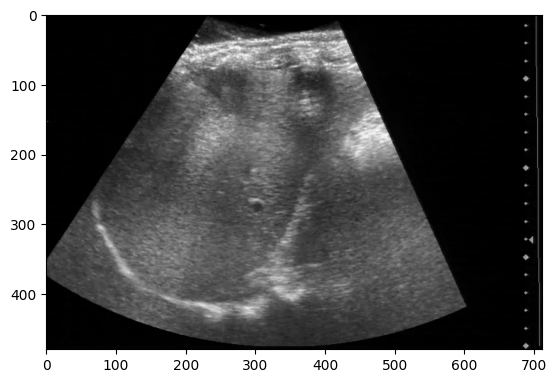

In [49]:
videoIdx = 1 # Choose video to visualize
noFrames = 100 # Choose first noFrames to visualize

vidShow=videosList[videoIdx][:noFrames]
for i in range(noFrames):
    plt.imshow(vidShow[i],cmap='gray')
    plt.show()
    clear_output(wait=True)

In [ ]:
def simTrans(p,q):
  """SIMTRANS computes the similarity transformation parameters from x to y
  where x and y is N-by-2 arrays of points in two different
  imaging modalities"""

  # Compute centered landmark sets
  pC = p-p.mean(axis=1)[:,None]
  qC = q-q.mean(axis=1)[:,None]



  num=np.sum(np.sqrt(np.sum(qC**2,axis=0)))
  denom=np.sum(np.sqrt(np.sum(pC**2,axis=0)))

  s_hat=num/denom
 
    
  C = qC @ pC.T
  U,_,V=np.linalg.svd(C)
  
  R_hat = U @ np.array([[1,0],[0,np.linalg.det(U @ V.T)]]) @ V.T
  
  t_hat = q.mean(axis=1)[:,None]-s_hat*R_hat @ p.mean(axis=1)[:,None]; 

  return R_hat,s_hat,t_hat.squeeze()